In [1]:
import pandas as pd
import json
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pylab as plt

In [2]:
df_abstract = pd.read_csv('distance_dim_abstract.csv', index_col=0)
df_title = pd.read_csv('distance_dim_title.csv', index_col=0)
with open('dim_sample.json') as f:
    all_data = json.load(f)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# create a dataframe with row indices as project ids and column indices as publication ids
# if publication is in project, then 1, else 0
# if publication date is before project start date, then 0, else 1
# ratio of intersection of organisations from project and publication to organisations from publication
# ratio of intersection of authors from project and publication to authors from publication

pub_data = {}
for pro_id in all_data.keys():
    for pub_id in all_data[pro_id]['publications'].keys():
        pub_data[pub_id] = all_data[pro_id]['publications'][pub_id]

data_matrix = [[0.] * len(pub_data) for _ in range(len(all_data))]
for i, pro_id in enumerate(all_data.keys()):
    for j, pub_id in enumerate(pub_data.keys()):
        belongs = 1 if pub_id in all_data[pro_id]['publications'].keys() else 0
        abs_distance = df_abstract.at[int(pro_id), pub_id]
        title_distance = df_title.at[int(pro_id), pub_id]
        try:
            dis_ratio = len(set(all_data[pro_id]['disciplines']).intersection(set(pub_data[pub_id]['disciplines'])))/len(pub_data[pub_id]['disciplines'])
        except:
            dis_ratio = 0
        data_matrix[i][j] = [belongs, abs_distance, title_distance, dis_ratio]

df = pd.DataFrame(data_matrix, index=all_data.keys(), columns=[pub[0] for pub in pub_data])
df.to_csv('xgb_data_dim.csv')
df.head()

1  \
9852805   [1, 0.2875594194265192, 0.6642790381936301, 1.0]   
13062422  [0, 0.4991302191138179, 0.6564672710382878, 0.0]   
13528070  [0, 0.5133372443553397, 0.7842749982113738, 0.0]   
13057717  [0, 0.5154963419400866, 0.6819780707863761, 0.0]   
13308163  [0, 0.5670856483851288, 0.6744101447767287, 0.0]   

                                                         1  \
9852805   [0, 0.4958539072792274, 0.7160301943208441, 0.0]   
13062422  [1, 0.4902762493443311, 0.6730567992331988, 0.0]   
13528070   [0, 0.5051367385490081, 0.786828075187754, 0.0]   
13057717  [0, 0.5073923183205311, 0.6951441897480796, 0.0]   
13308163  [0, 0.5610857735755924, 0.6885640124515914, 0.0]   

                                                       1  \
9852805   [0, 0.6825602806506581, 0.8049510162070618, 0]   
13062422  [1, 0.6576359237111665, 0.8151954457764434, 0]   
13528070  [0, 0.6864440924928317, 0.8120491505890275, 0]   
13057717   [0, 0.687044545794813, 0.8083417051501418, 0]   
13308163  [0, 0.7011100133493852, 0.8112603804598324, 0]   

                                                         1  \
9852805   [0, 0.4545786761318873, 0.6644301577587975, 0.0]   
13062422   [1, 0.4476944878953877, 0.584464829585078, 0.0]   
13528070  [0, 0.4659672052385079, 0.7748613484411756, 0.0]   
13057717  [0, 0.4687219606610106, 0.6268860377137774, 0.0]   
13308163  [0, 0.5330352198168623, 0.6145512843751718, 0.0]   

                                                         1  \
9852805   [0, 0.5075963393282313, 0.7920385673053748, 0.0]   
13062422  [0, 0.5023565622509103, 0.7833185396612756, 0.0]   
13528070  [1, 0.1637975270719881, 0.1487800804551934, 1.0]   
13057717  [0, 0.5184544417535872, 0.7876426321523319, 0.0]   
13308163  [0, 0.5692858302277578, 0.7863230444619878, 0.0]   

                                                         1  \
9852805   [0, 0.5312166319658472, 0.7062482021336525, 0.0]   
13062422  [0, 0.5266164911975517, 0.6571823457774251, 0.0]   
13528070  [0, 0.5389054260629708, 0.7843815142493774, 0.0]   
13057717  [1, 0.4359576771956103, 0.3669950936092986, 1.0]   
13308163  [0, 0.5860623532236513, 0.6750174161145063, 0.0]   

                                                         1  \
9852805   [0, 0.5456748709269896, 0.6623713648201996, 0.0]   
13062422   [0, 0.541441698680498, 0.5806651726793965, 0.0]   
13528070  [0, 0.5527614120433277, 0.7744254749623461, 0.0]   
13057717  [1, 0.4497335290349702, 0.3178785564143734, 1.0]   
13308163   [0, 0.596512690955136, 0.6114636994021897, 0.0]   

                                                         1  \
9852805   [0, 0.4997860290958477, 0.6362860446386422, 0.0]   
13062422  [0, 0.4943230585781948, 0.5304833030765943, 0.0]   
13528070   [0, 0.508882633390984, 0.7691204908146072, 0.0]   
13057717  [1, 0.4461000964320317, 0.3382286197372654, 0.5]   
13308163  [0, 0.5638211384460382, 0.5713798175841304, 0.0]   

                                                         1  \
9852805   [0, 0.5599356504690505, 0.6534807481781578, 0.0]   
13062422  [0, 0.5560473755382257, 0.5639969739334422, 0.0]   
13528070  [0, 0.5664543271080762, 0.7725733471883877, 0.0]   
13057717  [0, 0.5680471247731899, 0.6118258318520726, 0.0]   
13308163  [1, 0.1028351880349021, 0.0468921426132562, 1.0]   

                                                         1  \
9852805    [0, 0.526650897209203, 0.6565850236557714, 0.0]   
13062422  [0, 0.5219310990199545, 0.5698656488213942, 0.0]   
13528070  [0, 0.5345356246074074, 0.7732145979680313, 0.0]   
13057717   [0, 0.5364569774444016, 0.616116707458603, 0.0]   
13308163      [1, 0.37916604700903, 0.56494641097582, 1.0]   

                                                         1  \
9852805   [0, 0.5501951498290343, 0.6899692442064633, 0.0]   
13062422    [0, 0.546073092396903, 0.629842078275907, 0.0]   
13528070     [0, 0.55709893524334, 0.780510829122399, 0.0]   
13057717   [0, 0.558784549443347, 0.6612212757765656, 0.0]   
13308163   [1, 0.058082531341

(225, 635, 4)
(142875, 4)
[0]	test-logloss:0.60003
[100]	test-logloss:0.01915
[200]	test-logloss:0.01929
[296]	test-logloss:0.01930
0.6124031007751938
0.5968992248062015
0.5503875968992248
0.5426356589147286
0.5271317829457365
0.5038759689922481
0.4883720930232558
0.4186046511627907
0.3643410852713178
0.21705426356589147


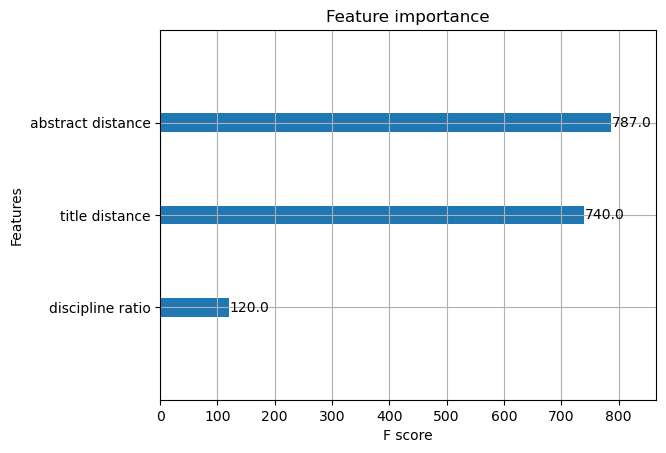

In [4]:
gb_raw_shape = (df.shape[0], df.shape[1], len(df.iloc[0, 0]))
print(gb_raw_shape)

gb_data = []
for i in range(len(list(df))):
    gb_data.extend(df.iloc[:, i].values.tolist())
gb_data = np.array(gb_data)
print(gb_data.shape)

project_numbers = np.array(list(range(1, gb_raw_shape[0] + 1)) * gb_raw_shape[1])

X = gb_data[:, 1:]
y = gb_data[:, 0]

train_pro_len = 180
train_pub_len = 506
split = train_pub_len * gb_raw_shape[0]
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['abstract distance', 'title distance', 'discipline ratio']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=200, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        p_numbers = list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1]
        filtered_p_numbers = [p for p in p_numbers if p in list(range(train_pro_len + 1, gb_raw_shape[0] + 1))]
        project_numbers_pred.append(filtered_p_numbers[:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[train_pub_len:]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

(225, 635, 4)
(142875, 4)
[0]	test-logloss:0.60839
[100]	test-logloss:0.05465
[200]	test-logloss:0.05807
[284]	test-logloss:0.05621
0.29457364341085274
0.2713178294573643
0.23255813953488372
0.20930232558139536
0.1937984496124031
0.13953488372093023
0.10077519379844961
0.08527131782945736
0.05426356589147287
0.031007751937984496


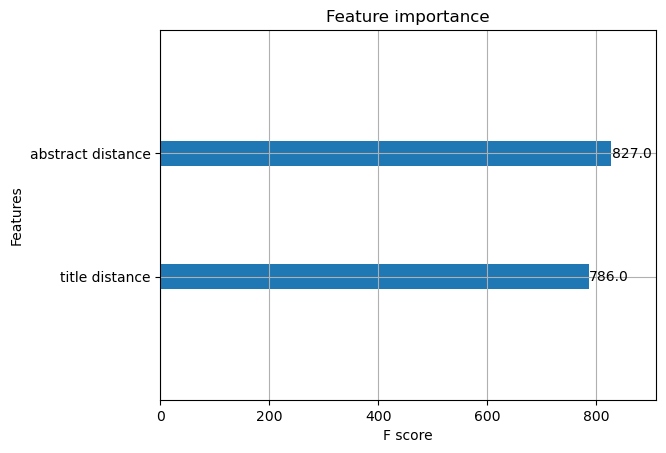

In [5]:
# drop discipline column
gb_raw_shape = (df.shape[0], df.shape[1], len(df.iloc[0, 0]))
print(gb_raw_shape)

gb_data = []
for i in range(len(list(df))):
    gb_data.extend(df.iloc[:, i].values.tolist())
gb_data = np.array(gb_data)
print(gb_data.shape)

project_numbers = np.array(list(range(1, gb_raw_shape[0] + 1)) * gb_raw_shape[1])
# gb_data = np.hstack((gb_data, project_numbers))
# gb_data

X = gb_data[:, 1:3]
y = gb_data[:, 0]

train_pro_len = 180
train_pub_len = 506
split = train_pub_len * gb_raw_shape[0]
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['abstract distance', 'title distance']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=200, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        p_numbers = list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1]
        filtered_p_numbers = [p for p in p_numbers if p in list(range(train_pro_len + 1, gb_raw_shape[0] + 1))]
        project_numbers_pred.append(filtered_p_numbers[:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[train_pub_len:]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

In [6]:
# support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

gb_raw_shape = (df.shape[0], df.shape[1], len(df.iloc[0, 0]))
print(gb_raw_shape)

gb_data = []
for i in range(len(list(df))):
    gb_data.extend(df.iloc[:, i].values.tolist())
gb_data = np.array(gb_data)
print(gb_data.shape)

project_numbers = np.array(list(range(1, gb_raw_shape[0] + 1)) * gb_raw_shape[1])

X = gb_data[:, 1:]
y = gb_data[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

param_grid = {'C': [100],  
              'gamma': [1], 
              'kernel': ['rbf']}  
svc = SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)
print(clf.best_params_)

# make prediction
y_pred = clf.predict(X_test)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[train_pub_len:]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

(225, 635, 4)
(142875, 4)
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
0.015503875968992248
